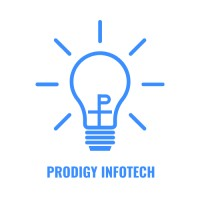


## Prodigy Infotech

### Author : Ahmed Sheta


### Data Science
### Task-02

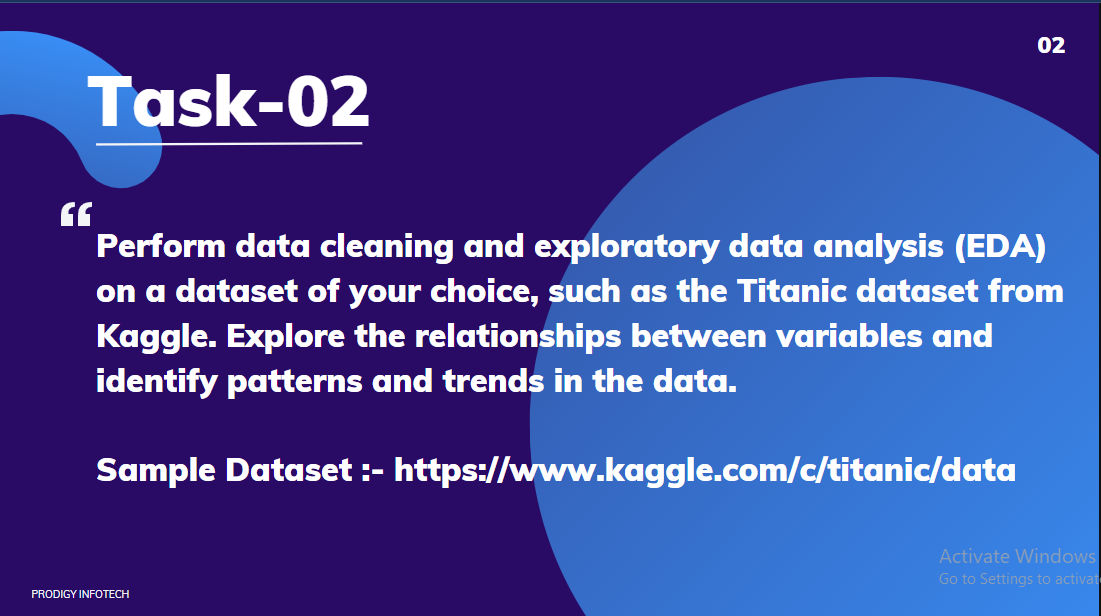

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [83]:
train_data.shape

(891, 12)

In [84]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# data visualization: 




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Plots For Categorical Variables</p>

In [87]:
cat_vars = train_data.select_dtypes(include='object').columns.tolist()
cat_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

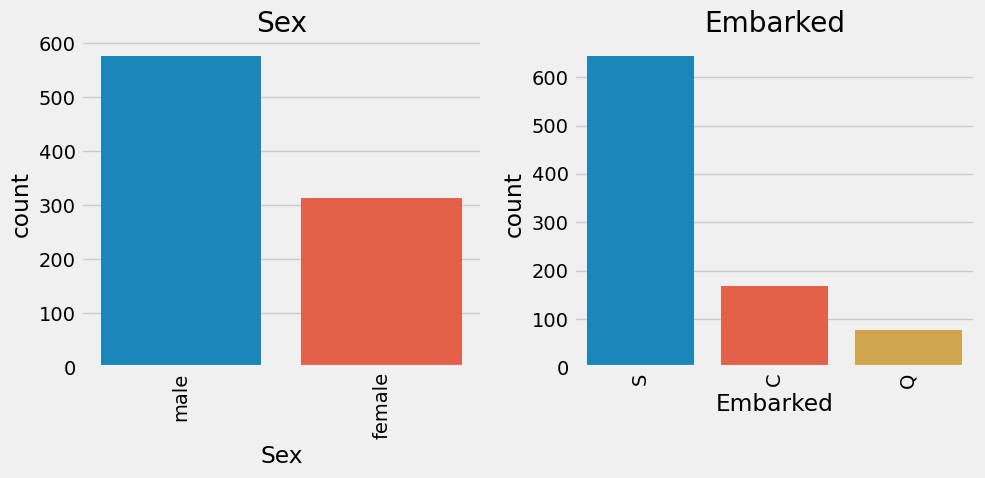

In [88]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = ['Sex','Embarked']
# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# create a countplot with largest 12 values : 
for i, var in enumerate(cat_vars):
    top_values = train_data[var].value_counts().nlargest(12).index
    filtered_df = train_data[train_data[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

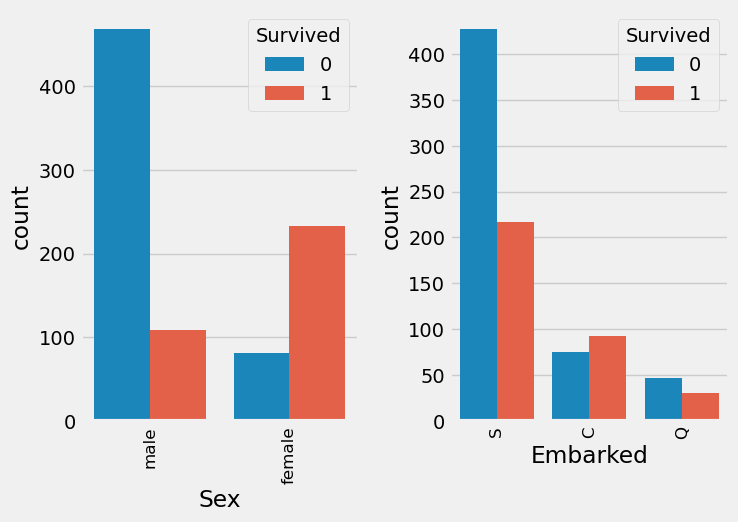

In [89]:
# list of categorical variables to plot
cat_vars = ['Sex','Embarked']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
axs = axs.flatten()


# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Survived', data=train_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90,size=12)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

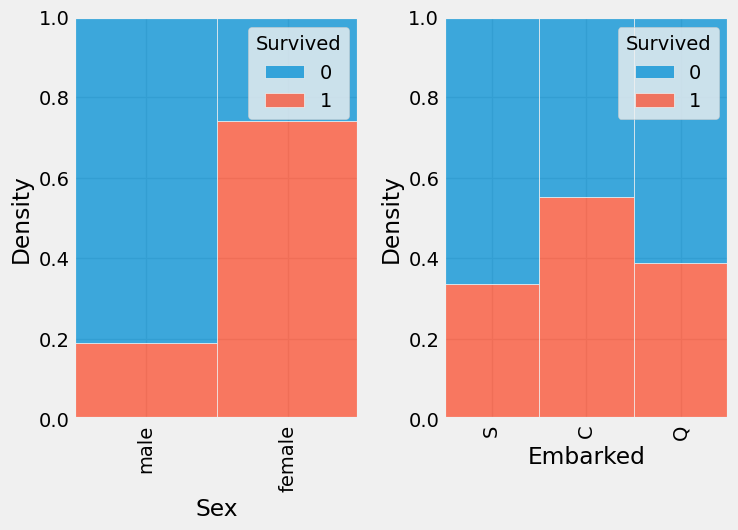

In [90]:
import warnings
warnings.filterwarnings("ignore")

# get list of categorical variables
cat_vars = ['Sex','Embarked']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Survived', data=train_data, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(train_data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
    
# adjust spacing between subplots
fig.tight_layout()


# show plot
plt.show()

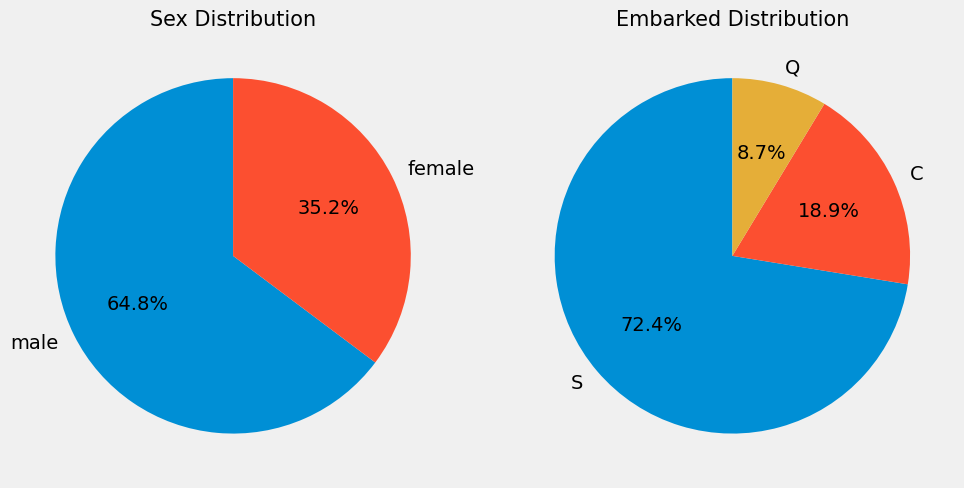

In [91]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = ['Sex','Embarked']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = train_data[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution',size=15)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> **Plots For numerical Variables**</p>

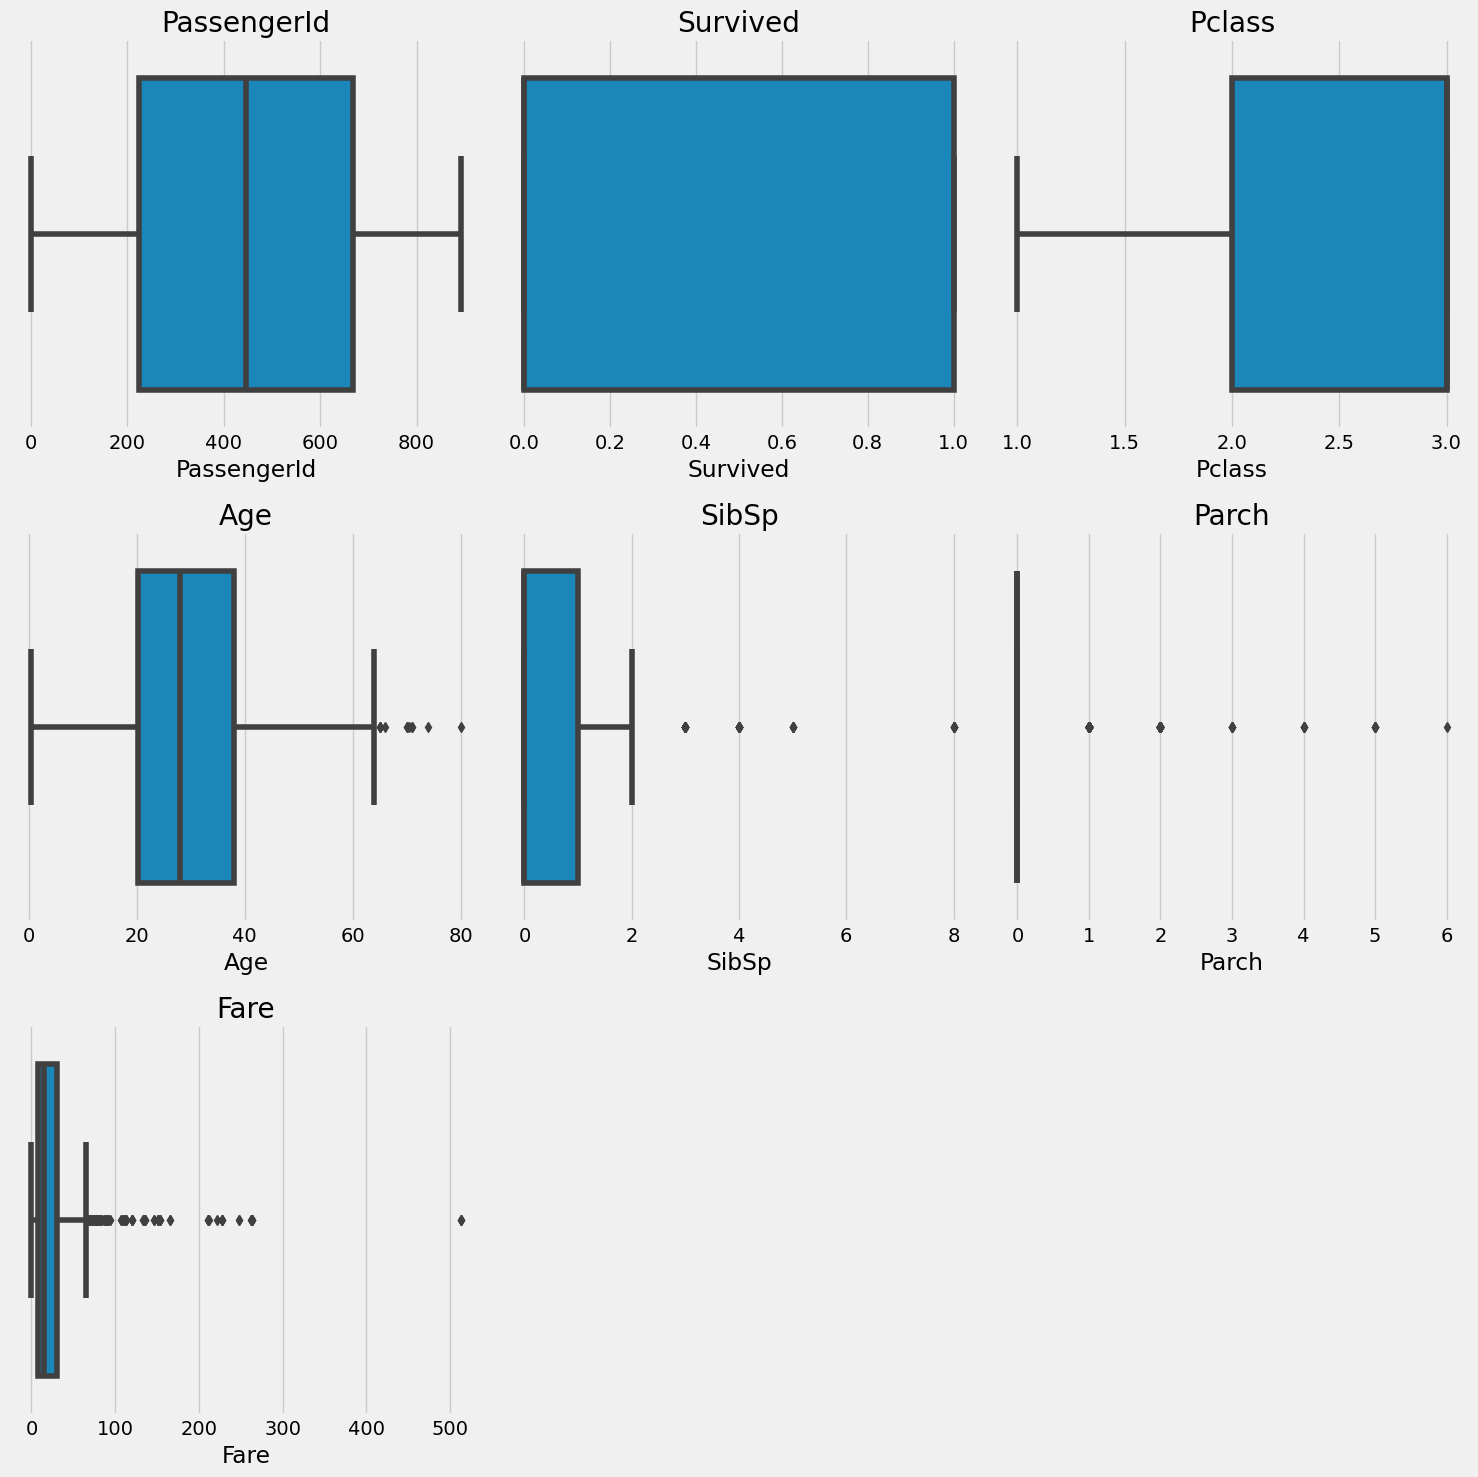

In [92]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = train_data.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=train_data[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

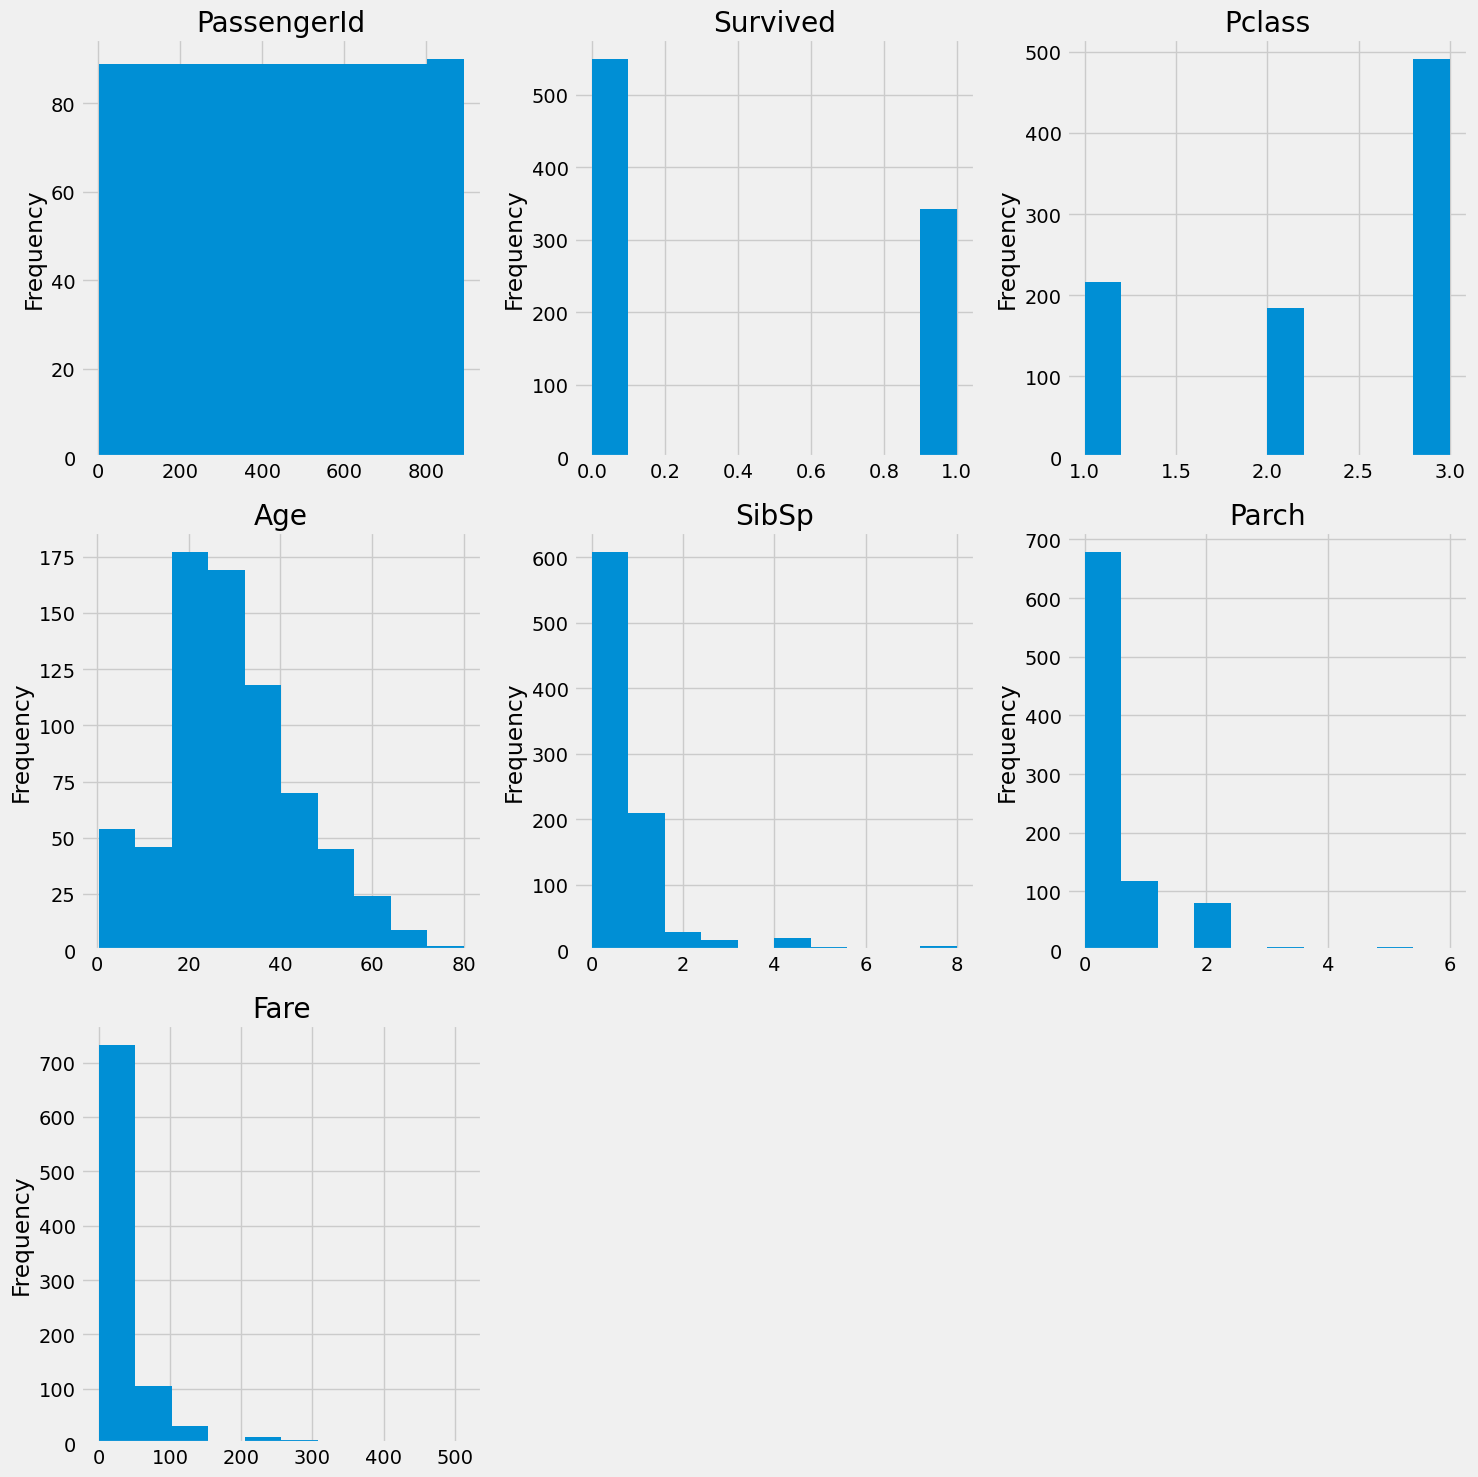

In [93]:
# Get the names of all columns with data type 'int'
int_vars = train_data.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    train_data[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

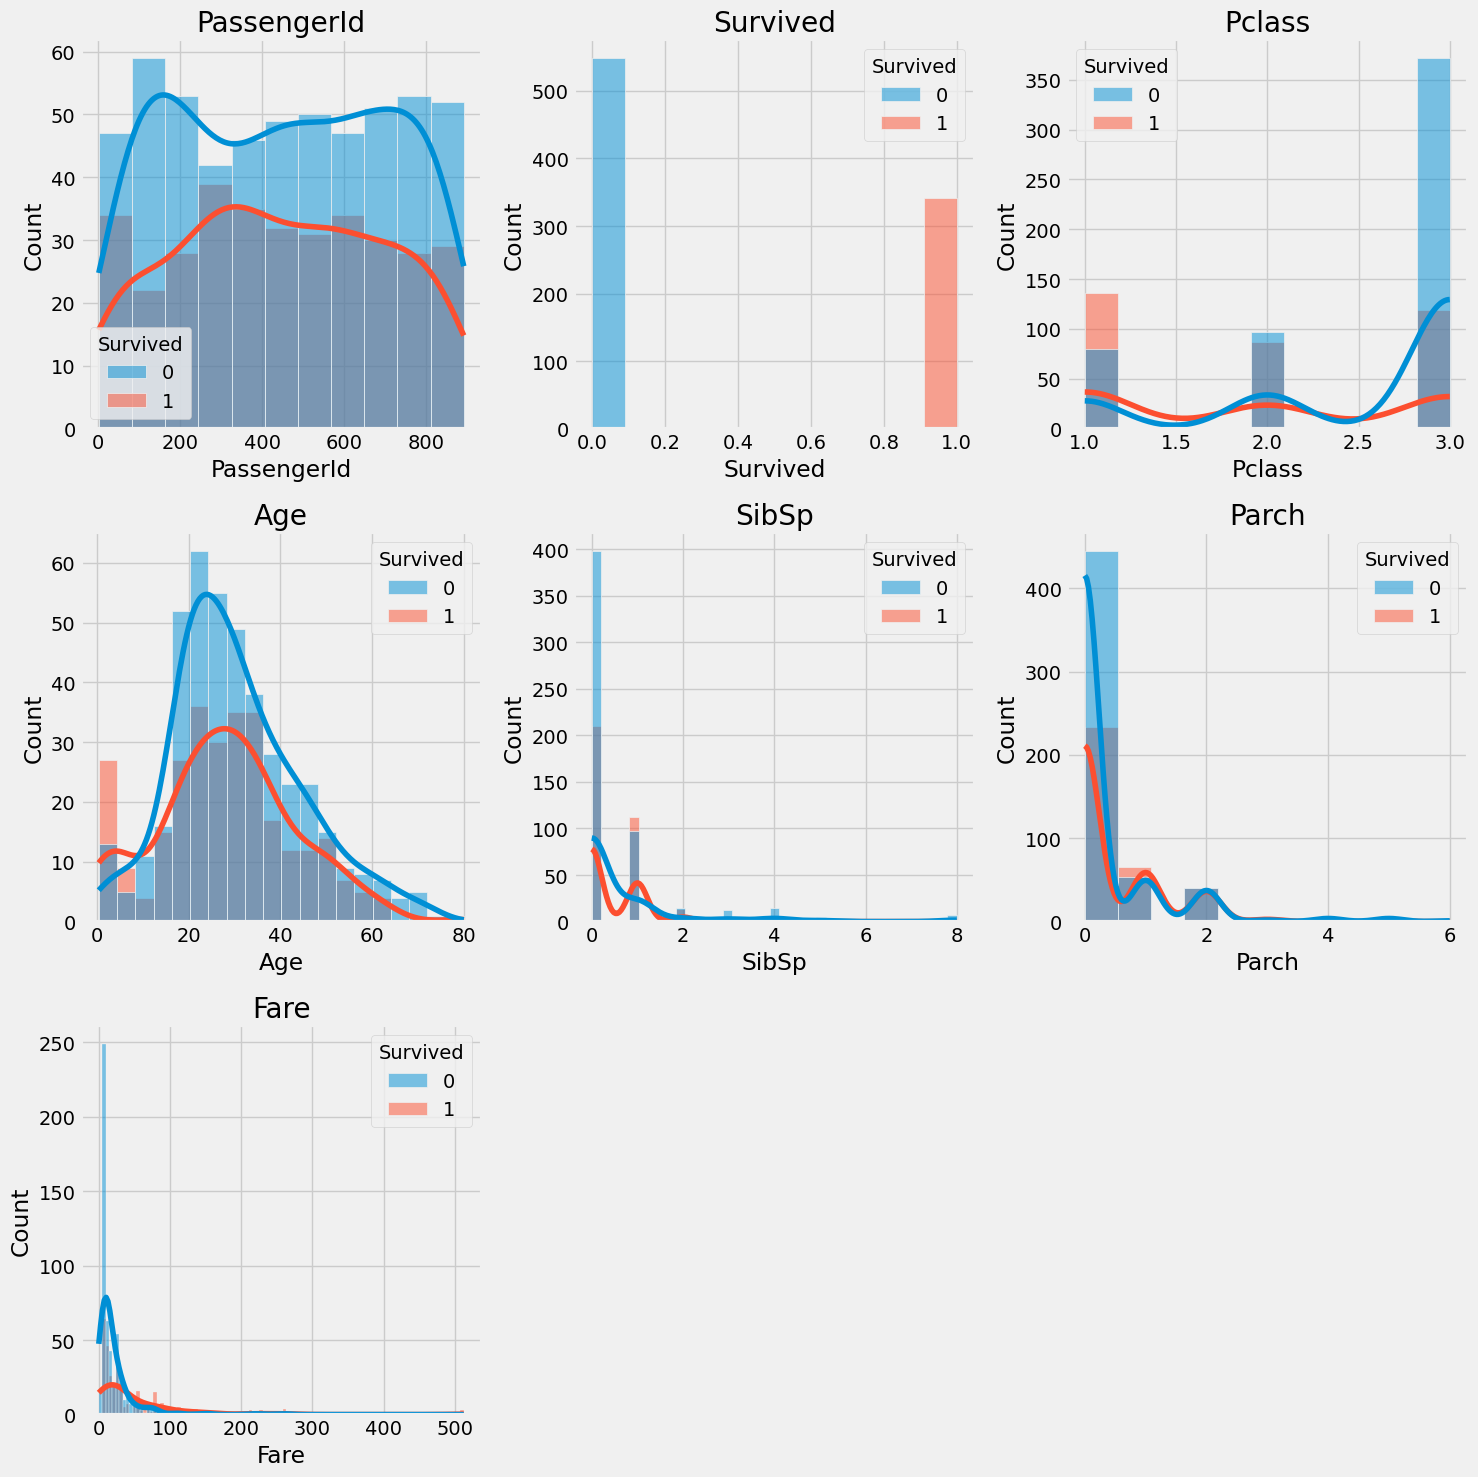

In [94]:
# Get the names of all columns with data type 'int'
int_vars = train_data.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=train_data, x=var, hue='Survived', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [95]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [96]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [98]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


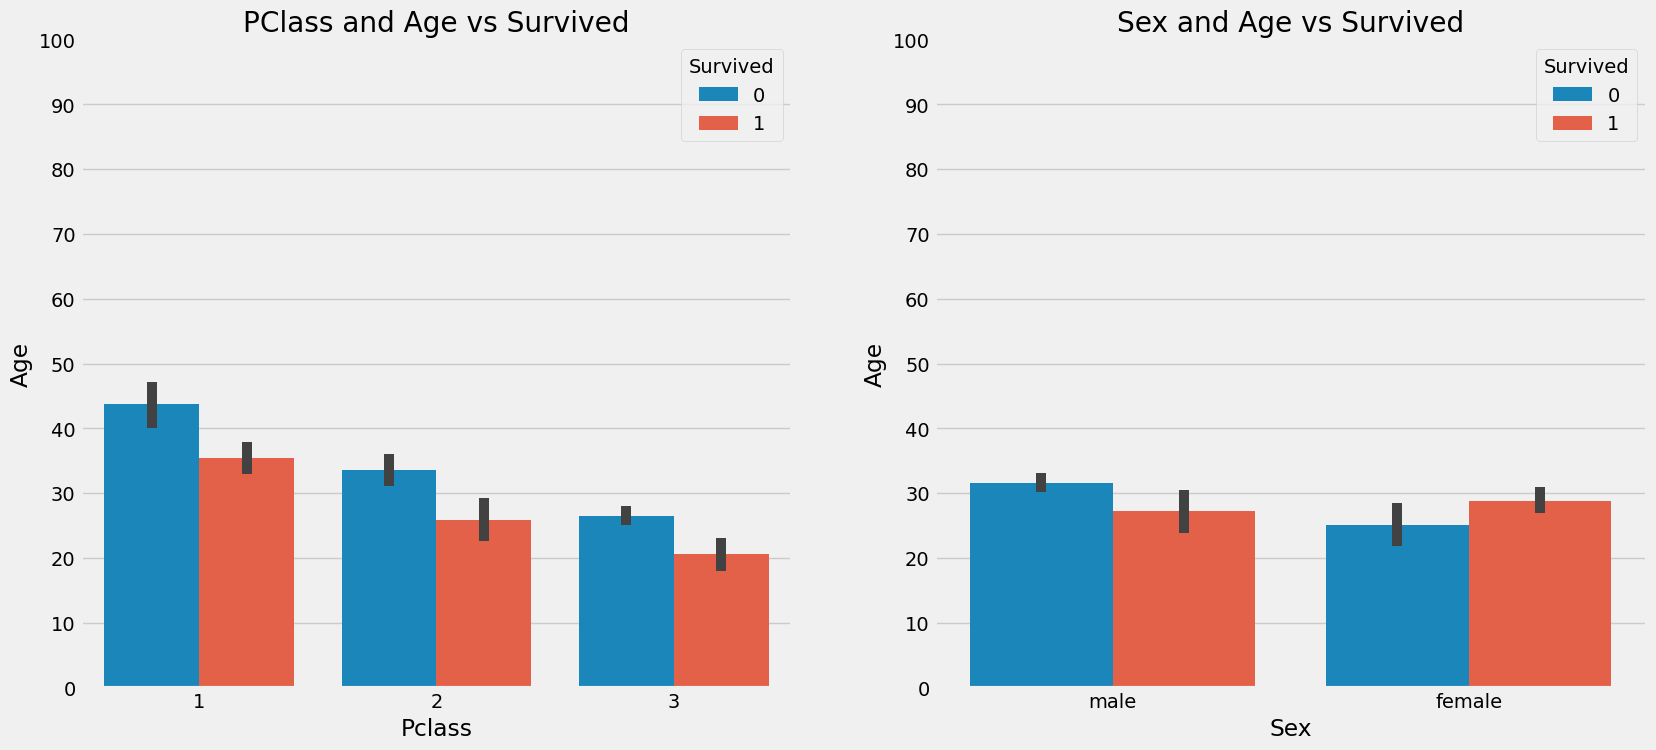

In [99]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot for Pclass and Age vs Survived
sns.barplot(x='Pclass', y='Age', hue='Survived', data=train_data, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Bar plot for Sex and Age vs Survived
sns.barplot(x='Sex', y='Age', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [100]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [101]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [102]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [103]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [104]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Other'),'Age']=46

In [105]:
train_data.Age.isnull().any()

False

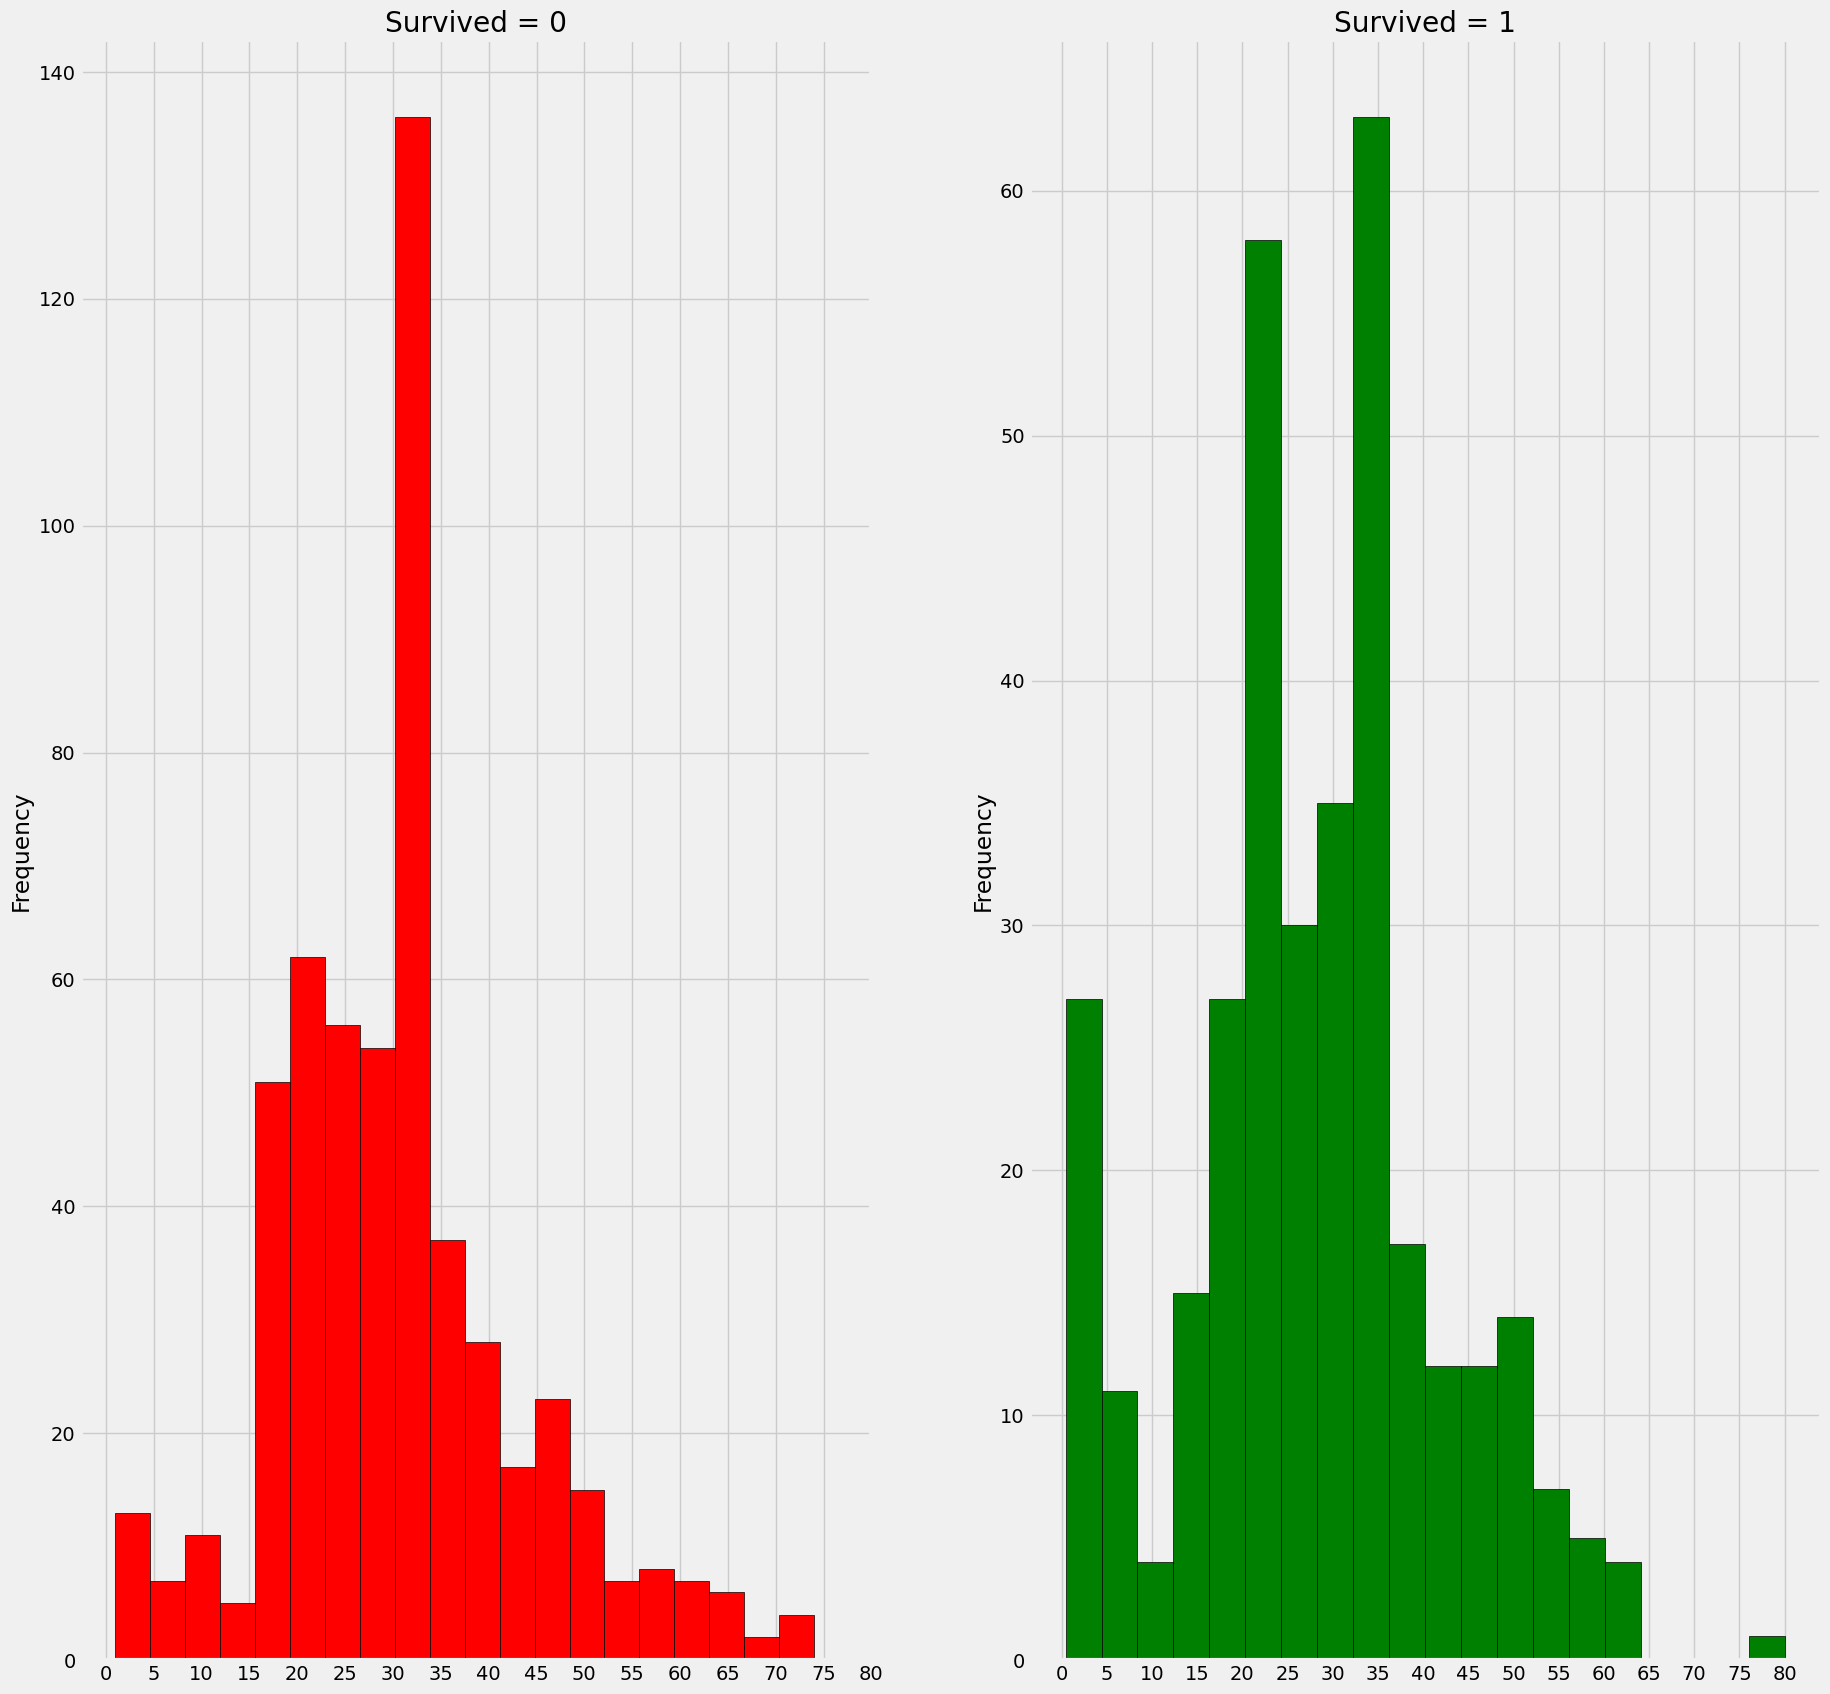

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

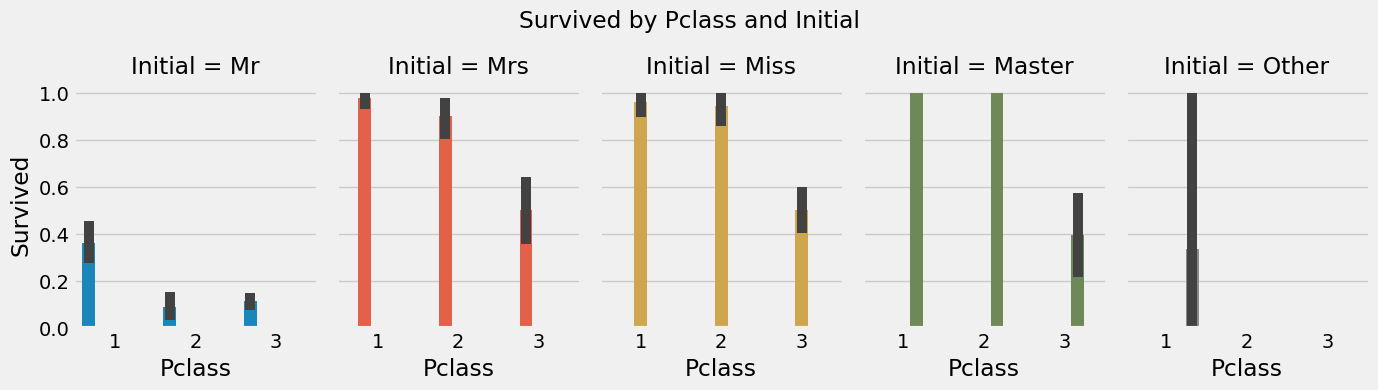

In [107]:
sns.catplot(x='Pclass', y='Survived', hue='Initial', kind='bar', data=train_data, col='Initial', height=4, aspect=0.7)
plt.subplots_adjust(top=0.8)  # Adjust the top space to accommodate the title
plt.suptitle('Survived by Pclass and Initial')
plt.show()

In [108]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


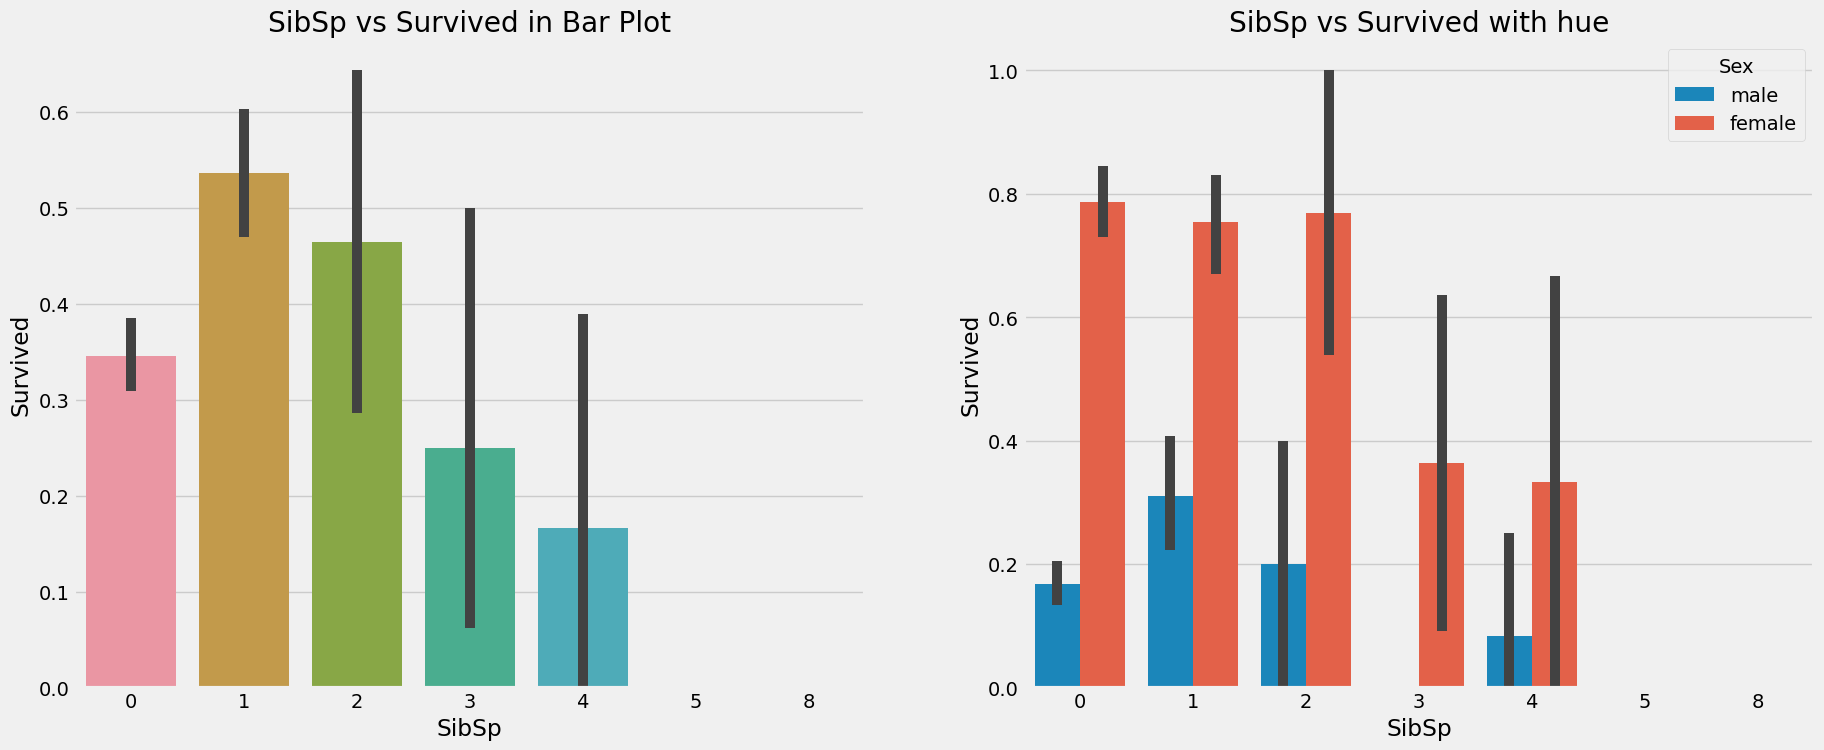

In [110]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot for SibSp vs Survived (without hue)
sns.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0])
ax[0].set_title('SibSp vs Survived in Bar Plot')

# Bar plot for SibSp vs Survived (with hue)
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train_data, ax=ax[1])
ax[1].set_title('SibSp vs Survived with hue')
plt.legend(title='Sex', loc='upper right')  # Add a legend for the hue

plt.show()

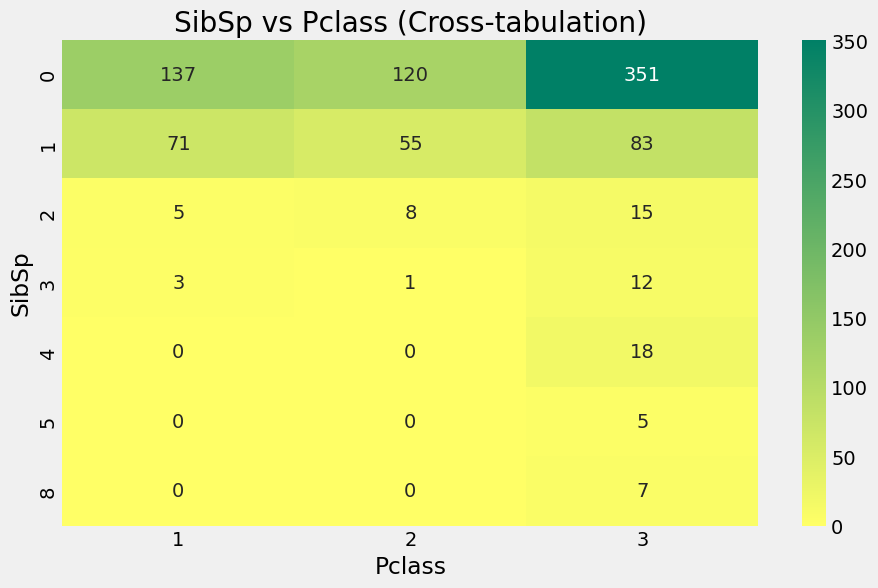

In [111]:
cross_tab = pd.crosstab(train_data.SibSp, train_data.Pclass)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='summer_r')
plt.title('SibSp vs Pclass (Cross-tabulation)')
plt.xlabel('Pclass')
plt.ylabel('SibSp')
plt.show()




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Highly Correlated Columns</p>

In [122]:
corr =train_data.corr()
corr_greater_than_20 = corr[corr>=.2]
corr_greater_than_20

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.000000,NaN,NaN,NaN,NaN,0.257307
Pclass,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.000000,0.414838,NaN
Parch,NaN,NaN,NaN,NaN,0.414838,1.000000,0.216225
Fare,NaN,0.257307,NaN,NaN,NaN,0.216225,1.000000


<Axes: >

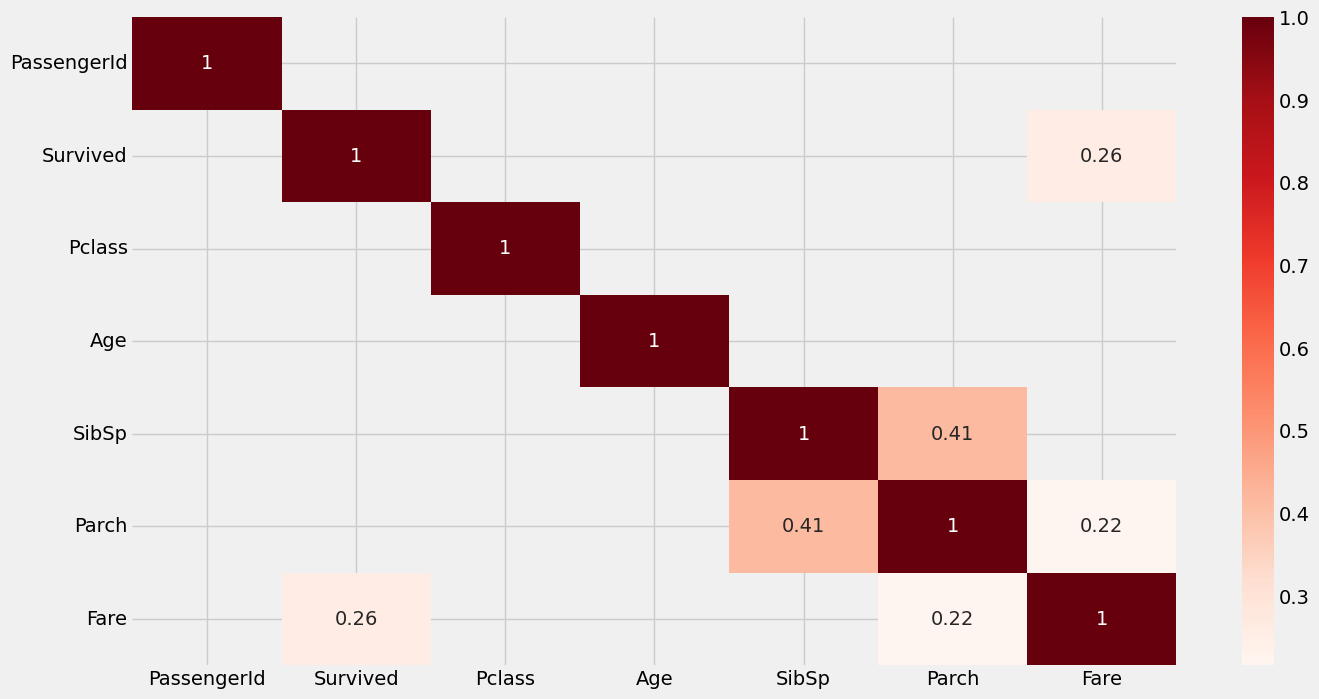

In [123]:
plt.figure(figsize=(15,8))
sns.heatmap (corr_greater_than_20,annot=True,cmap='Reds')